In [1]:
import torch
from diffusers import DiffusionPipeline

In [3]:
# Load RealVisXL pipeline from Hugging Face model hub
pipe = DiffusionPipeline.from_pretrained(
    "SG161222/RealVisXL_V3.0",  # model repo id
    torch_dtype=torch.float16,  # Use half-precision to reduce memory usage
    use_safetensors=True,       # load weights using the safer/faster safetensors format if available
)

# Move the pipeline to the GPU for inference
pipe = pipe.to("cuda")

# Enable attention slicing to reduce peak memory usage during generation
pipe.enable_attention_slicing()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [4]:
prompt = """" Light-medium skintone male, oval face, neutral expression.
Short dark brown thick hair, straight hairline, smooth forehead.
Short well-groomed beard. Medium round dark brown eyes, average lashes.
Medium-thick slightly arched dark brown brows. Straight medium nose, average lips with thinner upper lip.
Strong jawline, defined chin, average ears, no scars.

"""

image = pipe(prompt).images[0]
image.save("generated_face_with_formated_prompt.png")


Token indices sequence length is longer than the specified maximum sequence length for this model (80 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['no scars.']
Token indices sequence length is longer than the specified maximum sequence length for this model (80 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['no scars.']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scars.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scars.']


  0%|          | 0/50 [00:00<?, ?it/s]

(np.float64(-0.5), np.float64(767.5), np.float64(767.5), np.float64(-0.5))

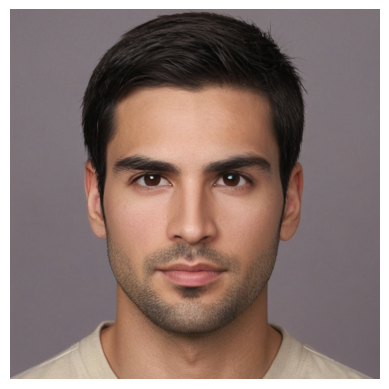

In [5]:
import matplotlib.pyplot as plt

prompt = """ Light-medium skintone male, oval face, neutral expression.
Short dark brown thick hair, straight hairline, smooth forehead.
Short well-groomed beard. Medium round dark brown eyes, average lashes.
Medium-thick slightly arched dark brown brows. Straight medium nose, average lips with thinner upper lip.
Strong jawline, defined chin, average ears, no scars.

"""

# Generate a smaller image to reduce memory usage
image = pipe(prompt, height=768, width=768).images[0]
image.save("generated_face_with_formated_prompt.png")
plt.imshow(image)
plt.axis('off')